# Project: Wrangling and Analyze Data

## Introduction
The dataset being wrangled (and analyzed and visualized) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.
This project aims at getting data from web based sources, identifying tidiness and quality issues and cleaning the data. Further EDA would also be conducted and visualizations plotted.

The steps in this project includes
<ol>
<li><a href="#gathering">Gathering data</a></li>
<li><a href="#assessing">Assessing data</a></li>
<li><a href="#cleaning">Cleaning data</a></li>
<li><a href="#storing">Storing data</a></li>
<li><a href="#analyzing">Analyzing, and visualizing data</a></li>
<li><a href="#reporting">Reporting</a></li>
</0l>

In [1]:
#Importing Modules
import pandas as pd
import numpy as np
import requests
import tweepy
import json
from timeit import default_timer as time
import re
import seaborn as sns
import matplotlib.pyplot as plt



<a id='gathering'></a>
## Data Gathering
In the cell below, I gathered **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Reading Files
twitter_data = pd.read_csv('twitter-archive-enhanced.csv')
twitter_data.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Getting the image prediction data from a url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#Writing the image prediction data into a tsv file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

#Opening the image prediction data 
img_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
img_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


1. Use Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [35]:
#Tweepy authentication 
bearer_token= ''

auth = tweepy.OAuth2BearerHandler(bearer_token)
api = tweepy.API(auth, wait_on_rate_limit = True)



In [39]:
#Initialization
tweets_id = twitter_data.tweet_id.values

success_count = 0
fail_count = 0
fails_dict = {}
start = time()

#Creating a txt file and writing each successful tweet json into it
with open('tweet_json.txt', 'w') as outfile:
    #Looping over each id in the twitter data archive and geting more information
    for each_id in tweets_id:
        try:
            tweet = api.get_status(each_id, tweet_mode='extended')
            success_count += 1
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        #Handling errors for tweet ids that couldn't be assessed
        except Exception as e:
            fail_count += 1
            fails_dict[each_id] = e
            pass
end = time()
print(f'{(end - start)/60} Minutes')
print(f'Successful :{success_count}')
print(f'Failed :{fail_count}')

Rate limit reached. Sleeping for: 71


46.57447059666665 Minutes
Successful :2321
Failed :35


In [4]:
#Reading the extended tweets
ext_tweets = pd.read_json('tweet_json.txt', lines = True)
ext_tweets.to_csv('tweet_json.csv', index = False)
ext_tweets = pd.read_csv('tweet_json.csv')
ext_tweets.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


---

<a id='Assessing'></a>
## Assessing Data
In this section,I detected and documented **quality issues and tidiness issue**. Using **both** visual assessment programmatic assessment to assess the data.

**Note:** The following key points were considered  when accessing the data.

* Only want original ratings (no retweets) that have images would be used. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.

### Visual Assessment

In [5]:
# Assessing the Archived tweets
twitter_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
# Assessing the image prediction data 
img_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
#Assessing the tweets
ext_tweets

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2317,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2318,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2319,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


---

### Programmatic Assessment
Using python functions to programmatically assess the datasets for tidyness and quality issues

- **Twitter Archived Data**

In [8]:
#Column names, number of values and datatype
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
#Number of unique values present in each column
twitter_data.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [10]:
#Statistical description of the data
twitter_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_data[twitter_data['rating_numerator'] > 30][:5]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


In [12]:
#Checking for duplicated rows
twitter_data.duplicated().sum()

0

In [13]:
#Checking all unique dog names in alphabetical order
sorted(twitter_data['name'].unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [14]:
#Confirming the type of data in the 'doggo' column
twitter_data['doggo'].unique()

array(['None', 'doggo'], dtype=object)

- **Image Prediction Data**

In [15]:
#Column names, number of values and datatype
img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
#Number of unique values present in each column
img_prediction.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [17]:
#Statistical description of the data
img_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
#Checking for duplicated rows
img_prediction['jpg_url'].duplicated().sum()

66

In [19]:
#Sample of the Image Prediction Data
img_prediction.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
365,672898206762672129,https://pbs.twimg.com/media/CVadWcCXIAAL4Sh.jpg,1,motor_scooter,0.835819,False,bobsled,0.035856,False,moped,0.033079,False
305,671520732782923777,https://pbs.twimg.com/media/CVG4i9UWEAAUH3U.jpg,1,Pomeranian,0.551031,True,Pekinese,0.135262,True,gibbon,0.061557,False
1708,817827839487737858,https://pbs.twimg.com/ext_tw_video_thumb/81782...,1,cocker_spaniel,0.387608,True,golden_retriever,0.264844,True,Pekinese,0.122123,True
1892,849336543269576704,https://pbs.twimg.com/media/C8lzFC4XcAAQxB4.jpg,1,patio,0.521788,False,prison,0.149544,False,restaurant,0.027153,False
370,672975131468300288,https://pbs.twimg.com/media/CVbjRSIWsAElw2s.jpg,1,pug,0.836421,True,Brabancon_griffon,0.044668,True,French_bulldog,0.036570,True
1987,872620804844003328,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,1,cocker_spaniel,0.513191,True,Sussex_spaniel,0.159088,True,standard_poodle,0.149509,True
211,670003130994700288,https://pbs.twimg.com/media/CUxUSuaW4AAdQzv.jpg,1,beagle,0.375313,True,Saint_Bernard,0.174911,True,English_foxhound,0.115888,True
1129,728015554473250816,https://pbs.twimg.com/media/ChpuRyvVAAARMoq.jpg,1,cocker_spaniel,0.384559,True,golden_retriever,0.091661,True,sandbar,0.081799,False
567,678341075375947776,https://pbs.twimg.com/media/CWnznDTU4AAa-6P.jpg,1,golden_retriever,0.853284,True,cocker_spaniel,0.026230,True,Labrador_retriever,0.024123,True
12,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True


- **Extended Tweets Data**

In [20]:
#Column names, number of values and datatype
ext_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2321 non-null   object 
 1   id                             2321 non-null   int64  
 2   id_str                         2321 non-null   int64  
 3   full_text                      2321 non-null   object 
 4   truncated                      2321 non-null   bool   
 5   display_text_range             2321 non-null   object 
 6   entities                       2321 non-null   object 
 7   extended_entities              2053 non-null   object 
 8   source                         2321 non-null   object 
 9   in_reply_to_status_id          76 non-null     float64
 10  in_reply_to_status_id_str      76 non-null     float64
 11  in_reply_to_user_id            76 non-null     float64
 12  in_reply_to_user_id_str        76 non-null     f

In [21]:
#Number of unique values present in each column
ext_tweets.nunique()

created_at                       2321
id                               2321
id_str                           2321
full_text                        2321
truncated                           1
display_text_range                142
entities                         2228
extended_entities                2053
source                              4
in_reply_to_status_id              75
in_reply_to_status_id_str          75
in_reply_to_user_id                29
in_reply_to_user_id_str            29
in_reply_to_screen_name            29
user                               32
geo                                 0
coordinates                         0
place                               1
contributors                        0
is_quote_status                     2
retweet_count                    1656
favorite_count                   1980
favorited                           1
retweeted                           1
possibly_sensitive                  1
possibly_sensitive_appealable       1
lang        

In [22]:
#Statistical description of the data
ext_tweets.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.321000e+03,2.321000e+03,7.600000e+01,7.600000e+01,7.600000e+01,7.600000e+01,0.0,0.0,0.0,2321.000000,2321.000000,2191.0,2191.0,2.600000e+01,2.600000e+01
mean,7.416238e+17,7.416238e+17,7.427978e+17,7.427978e+17,9.611911e+15,9.611911e+15,NaN,NaN,NaN,2454.966394,7017.148212,0.0,0.0,8.113972e+17,8.113972e+17
std,6.812803e+16,6.812803e+16,7.490563e+16,7.490563e+16,8.379467e+16,8.379467e+16,NaN,NaN,NaN,4157.962826,10901.457520,0.0,0.0,6.295843e+16,6.295843e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,1.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.780233e+17,6.780233e+17,6.756548e+17,6.756548e+17,3.421943e+08,3.421943e+08,NaN,NaN,NaN,493.000000,1223.000000,0.0,0.0,7.761338e+17,7.761338e+17
50%,7.175377e+17,7.175377e+17,7.031489e+17,7.031489e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1143.000000,3036.000000,0.0,0.0,8.281173e+17,8.281173e+17
75%,7.985851e+17,7.985851e+17,8.216960e+17,8.216960e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,2835.000000,8566.000000,0.0,0.0,8.637581e+17,8.637581e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,7.305050e+17,7.305050e+17,NaN,NaN,NaN,70123.000000,143922.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [23]:
#Checking for duplicated rows
ext_tweets.duplicated().sum()

0

In [24]:
#Sample of the Extended tweets Data
ext_tweets.sample(20)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
22,2017-07-19 00:47:34+00:00,887473957103951883,887473957103951872,This is Canela. She attempted some fancy porch...,False,"[0, 99]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 887473949361045505, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
110,2017-06-01 20:18:38+00:00,870374049280663552,870374049280663552,This is Zoey. She really likes the planet. Wou...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 870374041554751488, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
55,2017-07-02 15:32:16+00:00,881536004380872706,881536004380872704,Here is a pupper approaching maximum borkdrive...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 881535971568889856, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
91,2017-06-12 00:15:36+00:00,874057562936811520,874057562936811520,"I can't believe this keeps happening. This, is...",False,"[0, 129]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 874057549548589057, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
422,2017-01-12 00:55:47+00:00,819347104292290561,819347104292290560,Say hello to Anna and Elsa. They fall asleep i...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 819347090459463681, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
694,2016-10-05 00:40:09+00:00,783466772167098368,783466772167098368,This is Finn. He likes eavesdropping from fili...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 783466761438031873, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
198,2017-04-12 18:25:07+00:00,852226086759018497,852226086759018496,Meet General. He wasn't content with the quali...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 852223481894903808, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2117,2015-11-26 00:52:45+00:00,669680153564442624,669680153564442624,This is Shawwn. He's a Turkish Gangrene Robitu...,False,"[0, 139]","{'hashtags': [{'text': 'NoDaysOff', 'indices':...","{'media': [{'id': 669680140776046593, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
894,2016-07-18 03:06:01+00:00,754874841593970688,754874841593970688,RT @dog_rates: This is Rubio. He has too much ...,False,"[0, 81]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 679158360810352640, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,{'created_at': 'Tue Dec 22 04:35:49 +0000 2015...,NaN,NaN,NaN,NaN
2283,2015-11-17 03:16:00+00:00,666454714377183233,666454714377183232,I'll name the dogs from now on. This is Kreggo...,False,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666454708777799680, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [25]:
#Column names in the Extended tweets data
ext_tweets.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

### Quality issues
- Twitter archived data
1. Some inaccurate names of dogs -accuracy issues
2. 181 Retweeted data present -validity issues
3. Some numerator are more than the denominator but that would not be corrected because some people rate their dogs more than the highest rating -validity issues
4. Timestamp is an object datatype instead of a datetime datatype

- Image prediction data
1. Non-descriptive column names such as p1_dog, p2, p3, etc
2. 66 Jpg_url are duplicated. This means 66 rows have the same image but different Tweet Id
3. Inconsistency in the name of the dogs 

- Extended tweets data
1. Many unusable columns in the dataset, filled with NaN or is just not relevant
2. Non-original data is present
3. id and id_str are duplicated columns in the extended tweets data

- Combined problem
1. Source data has unnecessary characters present in both Twitter archived and Extended tweets

### Tidiness issues
1. Doggo, Floofer, Pupper and Puppo are dog classification that could be under one column
2. Timestamp can be split into Year, Month and Day
3. The prediction and confidence level could be reduced into two columns, keeping the most likely in the Image Prediction data
4. All tables can be merged into one Dataset

<a id='cleaning'></a>
## Cleaning Data
In this section, I cleaned **all** the issues documented while assessing. 
The result was high-quality and tidy master pandas DataFrame data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).

In [26]:
# Making copies of original pieces of data
twitter_data_clean = twitter_data.copy()
img_prediction_clean = img_prediction.copy()
ext_tweets_clean = ext_tweets.copy()

### Twitter Archive Data
#### Issue #1: Inaccurate names of dogs
#### Define: 
From the assessment of the unique names of dogs, there are values that start with lowercase letters and don't seem to be names of dogs. The solution is to replace the inaccurate data with a none value.
#### Code

In [27]:
#List of names to be removed
names_to_be_removed = ['a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating',
'just', 'life','light','mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this',
 'unacceptable', 'very']

#Replacing the values with None
twitter_data_clean['name'].replace(names_to_be_removed, 'None', inplace=True)

#### Test

In [28]:
#Checking if all the values have been replaced
twitter_data_clean[twitter_data_clean['name'].isin(names_to_be_removed)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Issue #2: Keeping only original ratings
#### Define: 
181 observations are retweets and as such should be removed from the analysis 
#### Code

In [29]:
#Subset only original tweets
twitter_data_clean = twitter_data_clean[twitter_data_clean['retweeted_status_id'].isnull()]
twitter_data_clean = twitter_data_clean[twitter_data_clean['in_reply_to_user_id'].isnull()]
twitter_data_clean = twitter_data_clean[twitter_data_clean['in_reply_to_status_id'].isnull()]

#### Test

In [30]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [31]:
#Checking for non-null retweeted observations
twitter_data_clean[pd.notnull(twitter_data_clean['retweeted_status_id'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Issue #3: Inconsistent datatype for timestamp
#### Define: 
Timestamp is an object datatype instead of a datetime datatype. This can easily be solved by converting it to datetime datatype
#### Code

In [32]:
pd.set_option('mode.chained_assignment', None)
#Converting the timestamp to a datetime datatype
twitter_data_clean['timestamp'] = pd.to_datetime(twitter_data_clean['timestamp'])

#Creating a new column for the year and month
twitter_data_clean['year'] = twitter_data_clean['timestamp'].dt.year
twitter_data_clean['month'] = twitter_data_clean['timestamp'].dt.month_name()

#### Test

In [33]:
#Sample of the Twitter Archive Data
twitter_data_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None,2016,September
899,758828659922702336,NaN,NaN,2016-07-29 00:57:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This doggo is just waiting for someone to be p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758828659...,13,10,None,doggo,None,None,None,2016,July
1336,705223444686888960,NaN,NaN,2016-03-03 02:49:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bode. He's a heavy sleeper. 9/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705223444...,9,10,Bode,None,None,None,None,2016,March
1544,689517482558820352,NaN,NaN,2016-01-19 18:39:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Carl. He just wants to make sure you'r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689517482...,12,10,Carl,None,None,None,None,2016,January
1391,700143752053182464,NaN,NaN,2016-02-18 02:24:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When it's Janet from accounting's birthday but...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700143752...,10,10,None,None,None,pupper,None,2016,February
668,790277117346975746,NaN,NaN,2016-10-23 19:42:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. He never backs down from a chal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790277117...,11,10,Bruce,None,None,None,None,2016,October
816,770787852854652928,NaN,NaN,2016-08-31 00:58:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His tongue has gone rogue. Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770787852...,10,10,Winston,None,None,None,None,2016,August
982,749403093750648834,NaN,NaN,2016-07-03 00:43:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Duuun dun... duuun dun... dunn dun. dunn dun....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749403093...,10,10,None,None,None,None,None,2016,July
909,757725642876129280,NaN,NaN,2016-07-25 23:54:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Beckham. He fell asleep at the wheel. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757725642...,11,10,Beckham,None,None,None,None,2016,July
708,785264754247995392,NaN,NaN,2016-10-09 23:44:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He requested to be carried around...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785264754...,12,10,Doc,None,None,None,None,2016,October


#### Issue #4: Dog stages are separated into different columns
#### Define: 
The Dog stages are divided into doggo, floofer, pupper and puppo. They would have to be combined under a dog stage column
#### Code

In [34]:
#Initialization
dog_stage = []

#Appending the values to dog_stage
def add_to(twitter_data_clean):
    '''This function appends the values of the doggo, floofer, 
    pupper and puppo variable to the dog stage column '''
    if twitter_data_clean['doggo'] == 'doggo':
        dog_stage.append('Doggo')
    elif twitter_data_clean['floofer'] == 'floofer':
        dog_stage.append('Floofer')
    elif twitter_data_clean['pupper'] == 'pupper':
        dog_stage.append('Pupper')
    elif twitter_data_clean['puppo'] == 'puppo':
        dog_stage.append('Puppo')
    else: 
        dog_stage.append('None')

#Apply the function to the dataset
twitter_data_clean.apply(add_to, axis=1)
twitter_data_clean['dog_stage'] = dog_stage

#Replacing None with NaN
twitter_data_clean['dog_stage'].replace('None', np.nan, inplace=True)


#### Test

In [35]:
#Getting the number of each value
twitter_data_clean['dog_stage'].value_counts()

Pupper     221
Doggo       83
Puppo       23
Floofer      9
Name: dog_stage, dtype: int64

#### Issue #5: Unnecessary columns in the dataset
#### Define: 
There are multiple columns that are not necessary to the dataset. These columns need to be dropped.
#### Code

In [36]:
#Checking the column names
twitter_data_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'year', 'month', 'dog_stage'],
      dtype='object')

In [37]:
#Dropping unwanted columns
twitter_data_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
'retweeted_status_timestamp', 'expanded_urls', 'doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [38]:
#Getting a sample of the Twitter archive data
twitter_data_clean.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,year,month,dog_stage
2168,669354382627049472,2015-11-25 03:18:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dug. Dug fucken loves peaches. 8/10 https...,8,10,Dug,2015,November,NaN
760,778383385161035776,2016-09-21 00:00:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Nala. She's a future Dogue model. Won'...,13,10,Nala,2016,September,NaN
1524,690597161306841088,2016-01-22 18:09:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lolo. She's America af. Behind in scie...,11,10,Lolo,2016,January,NaN
1168,721001180231503872,2016-04-15 15:44:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. Bath time is upon him. His fea...,11,10,Oliver,2016,April,Pupper
153,862457590147678208,2017-05-11 00:01:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Jersey. He likes to watch movies, but ...",13,10,Jersey,2017,May,NaN
442,819588359383371776,2017-01-12 16:54:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jazzy. She just found out that sandwic...,13,10,Jazzy,2017,January,NaN
1752,678969228704284672,2015-12-21 16:04:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lola. She's a Metamorphic Chartreuse. Pla...,11,10,Lola,2015,December,NaN
334,832682457690300417,2017-02-17 20:05:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Prosperous good boy 13/10 socioeconomic af htt...,13,10,None,2017,February,NaN
2026,671879137494245376,2015-12-02 02:30:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Brad. He's a chubby lil pup. Doesn't r...,5,10,Brad,2015,December,NaN
1318,706538006853918722,2016-03-06 17:52:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Oliver (pronounced ""Ricardo""). He's a ...",11,10,Oliver,2016,March,NaN


In [39]:
#Column names and datatype of the Twitter archive data
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   year                2097 non-null   int64              
 8   month               2097 non-null   object             
 9   dog_stage           336 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 180.2+ KB


#### Issue #6: Source column contains unnecessary data
#### Define: 
The source column still contains the html href tag. This can be removed using regular expressions
#### Code

In [40]:
#Cleaning the source column
twitter_data_clean['source'] = twitter_data_clean['source'].apply(lambda x: re.sub(r'<.*?>', '', x))

#### Test

In [41]:
#Checking the name of values in the source column
twitter_data_clean['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Image Prediction Data
#### Issue #1: Duplicated image links
#### Define:
There are some links for images that are duplicated in the jpg_url column. This can be resolved by removing the duplicates.
#### Code

In [42]:
#Dropping duplicates in the jpg_url column
img_prediction_clean.drop_duplicates('jpg_url', keep='first', inplace=True)

#### Test

In [43]:
#Checking the number of duplicates in the jpg_url column
img_prediction_clean['jpg_url'].duplicated().sum()

0

#### Issue #2: Multiple prediction and confidence column
#### Define: 
The prediction and confidence level could be reduced into two columns, keeping the most likely. This would solve both the problem of non descriptive column names and multiple prediction and confidence column.
#### Code

In [44]:
#Checking the datatype of the columns
img_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   int64  
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [45]:
#Initializing
dog_breed = []
confidence = []

#Merging the columns into one and 
def placement(img_prediction_clean):
    '''This function goes through the columns that 
    has whether the prediction is a dog breed or not 
    and appends the breed with it's confidence 
    level if the prediction is a dog breed'''
    if img_prediction_clean['p1_dog'] == True:
        dog_breed.append(img_prediction_clean['p1'])
        confidence.append(img_prediction_clean['p1_conf'])
    elif img_prediction_clean['p2_dog'] == True:
        dog_breed.append(img_prediction_clean['p2'])
        confidence.append(img_prediction_clean['p2_conf'])
    elif img_prediction_clean['p3_dog'] == True:
        dog_breed.append(img_prediction_clean['p3'])
        confidence.append(img_prediction_clean['p3_conf'])
    else:
        dog_breed.append('None')
        confidence.append('None')

#Applying the function to the dataset
img_prediction_clean.apply(placement, axis = 1)
img_prediction_clean['dog_breed'] = dog_breed
img_prediction_clean['prediction_confidence'] = confidence

#Dropping unneeded column
img_prediction_clean.drop(columns=['p1','p1_conf','p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], inplace=True)

#### Test

In [46]:
#Column names and datatype of the Image prediction data
img_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet_id               2009 non-null   int64 
 1   jpg_url                2009 non-null   object
 2   img_num                2009 non-null   int64 
 3   dog_breed              2009 non-null   object
 4   prediction_confidence  2009 non-null   object
dtypes: int64(2), object(3)
memory usage: 94.2+ KB


In [47]:
#Sampling the Image Prediction data
img_prediction_clean.sample(10)

,tweet_id,jpg_url,img_num,dog_breed,prediction_confidence
83,667495797102141441,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957
1184,738883359779196928,https://pbs.twimg.com/media/CkEKe3QWYAAwoDy.jpg,2,Labrador_retriever,0.691137
1845,838921590096166913,https://pbs.twimg.com/media/C6Ryuf7UoAAFX4a.jpg,1,Border_terrier,0.664538
168,668988183816871936,https://pbs.twimg.com/media/CUi5M7TXIAAY0gj.jpg,1,None,None
401,673689733134946305,https://pbs.twimg.com/media/CVltNgxWEAA5sCJ.jpg,1,Chesapeake_Bay_retriever,0.38222
1127,727644517743104000,https://pbs.twimg.com/media/Chkc1BQUoAAa96R.jpg,2,Great_Pyrenees,0.457164
1353,760190180481531904,https://pbs.twimg.com/media/Coy87yiWYAACtPf.jpg,1,None,None
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,None,None
1321,756303284449767430,https://pbs.twimg.com/media/Cn7tyyZWYAAPlAY.jpg,1,golden_retriever,0.981652
1889,848324959059550208,https://pbs.twimg.com/media/C8XbDR1WAAAxND8.jpg,1,malamute,0.544576


**Note** There might be issues when analyzing in the future is there is more None values than other dog names. Id remove all values with None because it means they were not identified.

In [48]:
#Selecting the columns that have values in the dog_breed column
img_prediction_clean = img_prediction_clean[img_prediction_clean['dog_breed'] != 'None' ]
img_prediction_clean['dog_breed'].value_counts()

golden_retriever        158
Labrador_retriever      108
Pembroke                 95
Chihuahua                91
pug                      63
                       ... 
Scotch_terrier            1
EntleBucher               1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: dog_breed, Length: 113, dtype: int64

#### Issue #3: Inconsistent dog breed names
#### Define: 
The names of the dogs are inconsistent with an underscore(_) separating them. This can be resolved by replacing the underscore with a space and making each starting letters capital
#### Code

In [49]:
#Replacing the underscore with space
img_prediction_clean['dog_breed'] = img_prediction_clean['dog_breed'].str.replace('_',' ')

#Changing all words to capital first letters 
img_prediction_clean['dog_breed'] = img_prediction_clean['dog_breed'].str.title()

#### Test

In [50]:
#Sampling the Image Prediction data
img_prediction_clean.sample(5)

,tweet_id,jpg_url,img_num,dog_breed,prediction_confidence
1102,721001180231503872,https://pbs.twimg.com/media/CgGCvxAUkAAx55r.jpg,1,Samoyed,0.950053
1251,747933425676525569,https://pbs.twimg.com/media/CmExV2qWkAAn_pN.jpg,1,Samoyed,0.998201
2031,883117836046086144,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,2,Golden Retriever,0.949562
441,674468880899788800,https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg,2,Chow,0.52623
641,681320187870711809,https://pbs.twimg.com/media/CXSJGAQUQAAoG9Q.jpg,1,Samoyed,0.362596


### Extended Tweets data 
#### Issue #1: There are some unoriginal tweets included
#### Define:
Some tweets are retweeted or in reply to other tweets. The analysis only requires original tweets. This can be done by removing all the tweets that are not original
#### Code

In [51]:
#Sub-setting to leave only original tweets
ext_tweets_clean = ext_tweets_clean[ext_tweets_clean['in_reply_to_status_id'].isnull()]
ext_tweets_clean = ext_tweets_clean[ext_tweets_clean['retweeted_status'].isnull()]
ext_tweets_clean = ext_tweets_clean[ext_tweets_clean['quoted_status_id'].isnull()]
ext_tweets_clean = ext_tweets_clean[ext_tweets_clean['is_quote_status'] == False]
 

#### Test

In [52]:
#Column names and datatype for the Extended tweets data
ext_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2320
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2058 non-null   object 
 1   id                             2058 non-null   int64  
 2   id_str                         2058 non-null   int64  
 3   full_text                      2058 non-null   object 
 4   truncated                      2058 non-null   bool   
 5   display_text_range             2058 non-null   object 
 6   entities                       2058 non-null   object 
 7   extended_entities              1960 non-null   object 
 8   source                         2058 non-null   object 
 9   in_reply_to_status_id          0 non-null      float64
 10  in_reply_to_status_id_str      0 non-null      float64
 11  in_reply_to_user_id            0 non-null      float64
 12  in_reply_to_user_id_str        0 non-null      f

#### Issue #2: Most columns are not needed for the analysis
#### Define:
There are many included columns that would not be needed for analysis. The solution is to drop such columns.
#### Code

In [53]:
#Checking the column names of the Extended tweets data
ext_tweets_clean.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

**Note** created_at, full_text and source column is the same as timestamp, text and source in the twitter archive data. I would delete them in the extended tweets data so as not to have duplicate columns in the master dataset

In [54]:
#List of columns that need to be dropped
columns_to_be_dropped = ['created_at', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status']

#Dropping the columns
ext_tweets_clean.drop(columns=columns_to_be_dropped, inplace = True)

In [55]:
#Renaming the id column
ext_tweets_clean.rename(columns={'id':'tweet_id'}, inplace = True)

#### Test

In [56]:
#Sampling the Extended Tweets dataset
ext_tweets_clean.sample(4)

,tweet_id,retweet_count,favorite_count,lang
1567,686007916130873345,360,2270,en
1540,687494652870668288,525,1752,en
980,747219827526344708,1431,4866,en
2070,670474236058800128,628,1329,en


### Merging the Dataset together

In [57]:
#Merging the datasets together
twitter_archive_master = twitter_data_clean.merge(ext_tweets_clean, how='left', on='tweet_id').merge(img_prediction_clean, how='left', on='tweet_id')

In [58]:
twitter_archive_master

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,year,month,dog_stage,retweet_count,favorite_count,lang,jpg_url,img_num,dog_breed,prediction_confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,2017,August,NaN,6953.0,33635.0,en,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,2017,August,NaN,5259.0,29174.0,en,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,2017,July,NaN,3462.0,21948.0,en,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,2017,July,NaN,7171.0,36721.0,en,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador Retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,2017,July,NaN,7704.0,35113.0,en,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,2015,November,NaN,36.0,88.0,en,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,Miniature Pinscher,0.560311
2093,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,None,2015,November,NaN,114.0,246.0,en,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian Ridgeback,0.408143
2094,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,None,2015,November,NaN,36.0,100.0,en,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German Shepherd,0.596461
2095,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,None,2015,November,NaN,39.0,112.0,en,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,Redbone,0.506826


In [59]:
#Column names and Datatype for the Master Dataset
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2097 non-null   int64              
 1   timestamp              2097 non-null   datetime64[ns, UTC]
 2   source                 2097 non-null   object             
 3   text                   2097 non-null   object             
 4   rating_numerator       2097 non-null   int64              
 5   rating_denominator     2097 non-null   int64              
 6   name                   2097 non-null   object             
 7   year                   2097 non-null   int64              
 8   month                  2097 non-null   object             
 9   dog_stage              336 non-null    object             
 10  retweet_count          2057 non-null   float64            
 11  favorite_count         2057 non-null   float64          

**Note: The prediction_confidence is an object datatype instead of a float. I would adjust that

In [60]:
#Changing the datatype of the prediction_confidence to float64 
twitter_archive_master['prediction_confidence'] = twitter_archive_master['prediction_confidence'].astype('float64')

---

## Storing Data
Here, I saved the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
#Storing data into a csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

---

<a id='analyzing'></a>
## Analyzing and Visualizing Data
In this section, I analyzed and visualized the wrangled data. 

In [62]:
#Column names and datatype of the Master dataset
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2097 non-null   int64              
 1   timestamp              2097 non-null   datetime64[ns, UTC]
 2   source                 2097 non-null   object             
 3   text                   2097 non-null   object             
 4   rating_numerator       2097 non-null   int64              
 5   rating_denominator     2097 non-null   int64              
 6   name                   2097 non-null   object             
 7   year                   2097 non-null   int64              
 8   month                  2097 non-null   object             
 9   dog_stage              336 non-null    object             
 10  retweet_count          2057 non-null   float64            
 11  favorite_count         2057 non-null   float64          

In [63]:
#Statistical summary of the Master dataset
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,year,retweet_count,favorite_count,img_num,prediction_confidence
count,2.097000e+03,2097.000000,2097.000000,2097.000000,2057.000000,2057.000000,1666.000000,1666.000000
mean,7.365594e+17,12.189318,10.448736,2015.860277,2275.183763,7652.101604,1.214286,0.551571
std,6.710178e+16,40.364996,6.645061,0.691435,4019.758162,11225.731532,0.573959,0.298923
min,6.660209e+17,0.000000,2.000000,2015.000000,11.000000,66.000000,1.000000,0.000010
25%,6.768197e+17,10.000000,10.000000,2015.000000,505.000000,1703.000000,1.000000,0.305955
50%,7.098528e+17,11.000000,10.000000,2016.000000,1096.000000,3475.000000,1.000000,0.550914
75%,7.877176e+17,12.000000,10.000000,2016.000000,2579.000000,9486.000000,1.000000,0.822939
max,8.924206e+17,1776.000000,170.000000,2017.000000,70123.000000,143922.000000,4.000000,0.999956


In [64]:
#Checking for number of unique values in each column in the Master dataset 
twitter_archive_master.nunique()

tweet_id                 2097
timestamp                2097
source                      4
text                     2097
rating_numerator           33
rating_denominator         14
name                      930
year                        3
month                      12
dog_stage                   4
retweet_count            1593
favorite_count           1889
lang                        5
jpg_url                  1666
img_num                     4
dog_breed                 113
prediction_confidence    1663
dtype: int64

In [65]:
#Sorting the Master dataset by Retweet count and Favorite count
twitter_archive_master.sort_values(['retweet_count', 'favorite_count'], ascending = False)[:5]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,year,month,dog_stage,retweet_count,favorite_count,lang,jpg_url,img_num,dog_breed,prediction_confidence
825,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13,10,None,2016,June,Doggo,70123.0,143922.0,en,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,Labrador Retriever,0.825333
864,739238157791694849,2016-06-04 23:31:25+00:00,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,13,10,None,2016,June,Doggo,52488.0,106565.0,en,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1.0,Eskimo Dog,0.503372
419,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,2016,December,NaN,51282.0,110945.0,en,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1.0,Chihuahua,0.505370
325,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,13,10,None,2017,January,Puppo,39663.0,123411.0,en,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,Lakeland Terrier,0.196015
60,879415818425184262,2017-06-26 19:07:24+00:00,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,13,10,Duddles,2017,June,NaN,37175.0,92319.0,en,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1.0,English Springer,0.383404


Tweet Id **744234799360020481** Had the most retweet count and favorite_count on the 18th of June 2016. It was a **Labrador Retriever** at the **Doggo** stage

In [66]:
#Sorting the Master dataset by prediction confidence
twitter_archive_master.sort_values('prediction_confidence', ascending = False)[:10]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,year,month,dog_stage,retweet_count,favorite_count,lang,jpg_url,img_num,dog_breed,prediction_confidence
1948,668636665813057536,2015-11-23 03:46:18+00:00,Twitter for iPhone,This is an Irish Rigatoni terrier named Berta....,10,10,None,2015,November,NaN,434.0,915.0,en,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,1.0,Komondor,0.999956
667,762464539388485633,2016-08-08 01:44:46+00:00,Twitter for iPhone,This is Buddy. His father was a bear and his m...,12,10,Buddy,2016,August,NaN,3800.0,9599.0,en,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,4.0,Chow,0.999953
1210,697463031882764288,2016-02-10 16:51:59+00:00,Twitter for iPhone,Happy Wednesday here's a bucket of pups. 44/40...,44,40,None,2016,February,NaN,1265.0,3156.0,en,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1.0,Labrador Retriever,0.999885
1626,675149409102012420,2015-12-11 03:05:37+00:00,Twitter for iPhone,holy shit 12/10 https://t.co/p6O8X93bTQ,12,10,None,2015,December,NaN,1493.0,3335.0,en,https://pbs.twimg.com/media/CV6czeEWEAEdChp.jpg,1.0,Chow,0.999876
1049,709566166965075968,2016-03-15 02:25:31+00:00,Twitter for iPhone,This is Olaf. He's gotta be rare. Seems sturdy...,12,10,Olaf,2016,March,NaN,1069.0,3246.0,en,https://pbs.twimg.com/media/Cdjiqi6XIAIUOg-.jpg,1.0,Chow,0.999837
375,814986499976527872,2016-12-31 00:08:17+00:00,Twitter for iPhone,This is Cooper. Someone attacked him with a sh...,11,10,Cooper,2016,December,Pupper,1183.0,7225.0,en,https://pbs.twimg.com/media/C09p5dJWIAE5qKL.jpg,1.0,Dalmatian,0.999828
589,777621514455814149,2016-09-18 21:33:11+00:00,Twitter for iPhone,This is Derek. You can't look at him and not s...,12,10,Derek,2016,September,NaN,2326.0,8171.0,en,https://pbs.twimg.com/media/Csqqoo5WEAAMTVW.jpg,1.0,Chow,0.999823
274,831322785565769729,2017-02-14 02:02:51+00:00,Twitter for iPhone,This is Pete. He has no eyes. Needs a guide do...,12,10,Pete,2017,February,Doggo,1434.0,8722.0,en,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,1.0,Old English Sheepdog,0.999715
1484,680115823365742593,2015-12-24 20:00:22+00:00,Twitter for iPhone,This is Ozzy. He woke up 2 minutes before he h...,9,10,Ozzy,2015,December,NaN,820.0,2485.0,en,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,1.0,Pug,0.999365
1212,697259378236399616,2016-02-10 03:22:44+00:00,Twitter for iPhone,Please stop sending in saber-toothed tigers. T...,8,10,None,2016,February,NaN,896.0,3028.0,en,https://pbs.twimg.com/media/Ca0ps3AXEAAnp9m.jpg,1.0,Great Dane,0.999223


**Chow** Dog breed are the easiest to identify by the prediction model

In [67]:
%matplotlib inline
#Initializing Seaborn
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize": (12,12)})

<a id='visualization'></a>
### Visualization

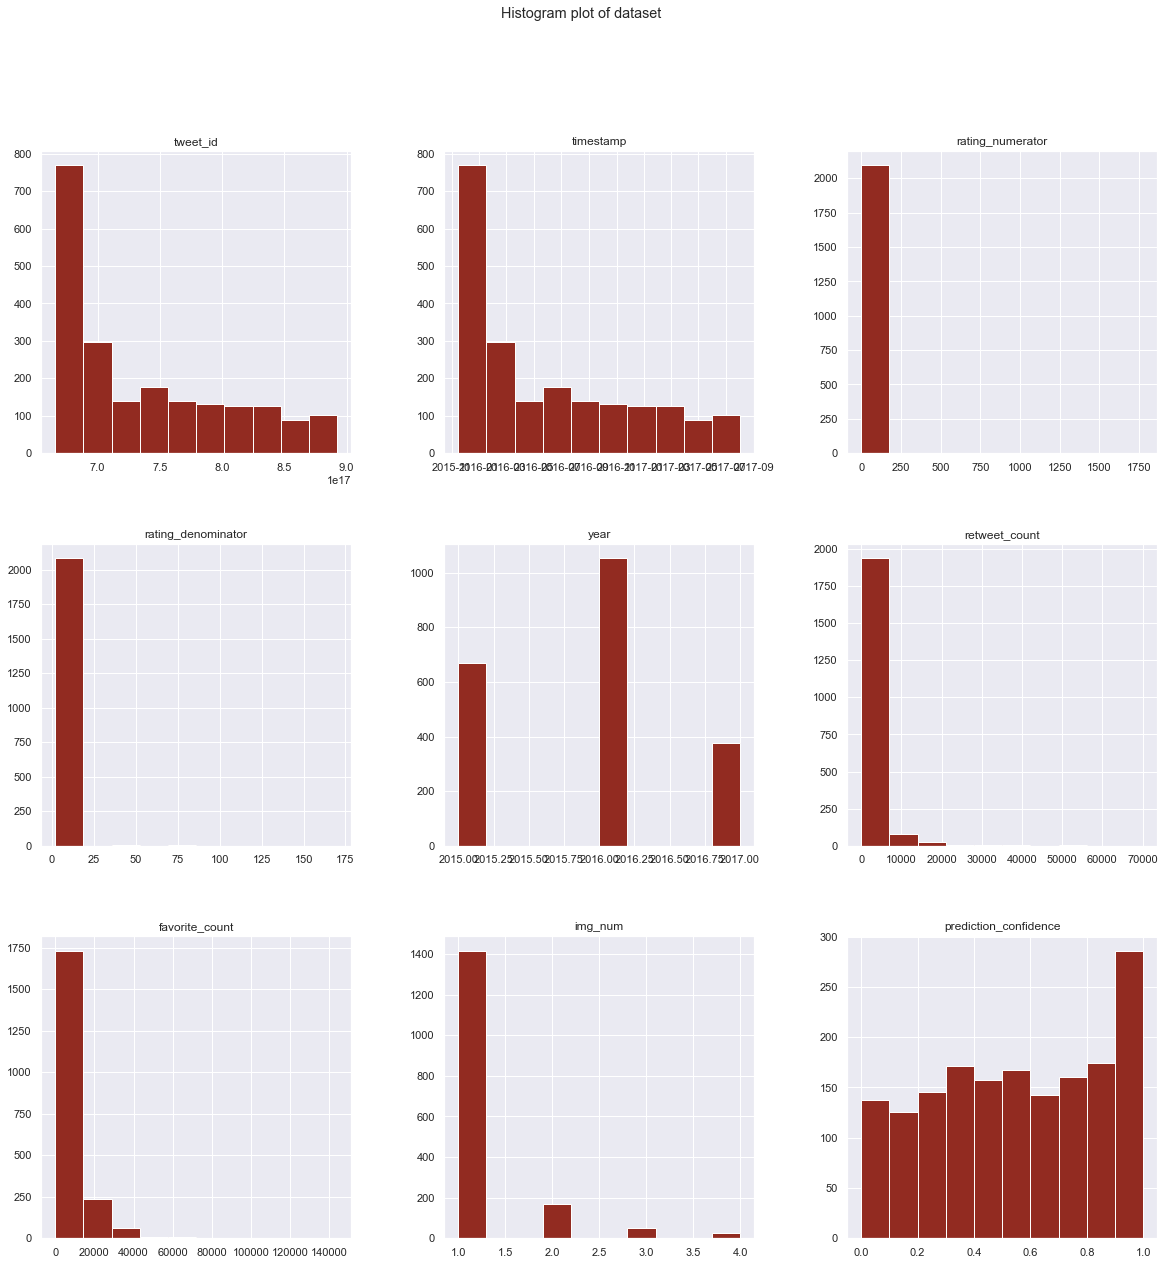

In [68]:
#Plotting the histogram of all numerical data in the dataset
twitter_archive_master.hist(figsize=[20,20], color='#922b21')
plt.suptitle('Histogram plot of dataset');

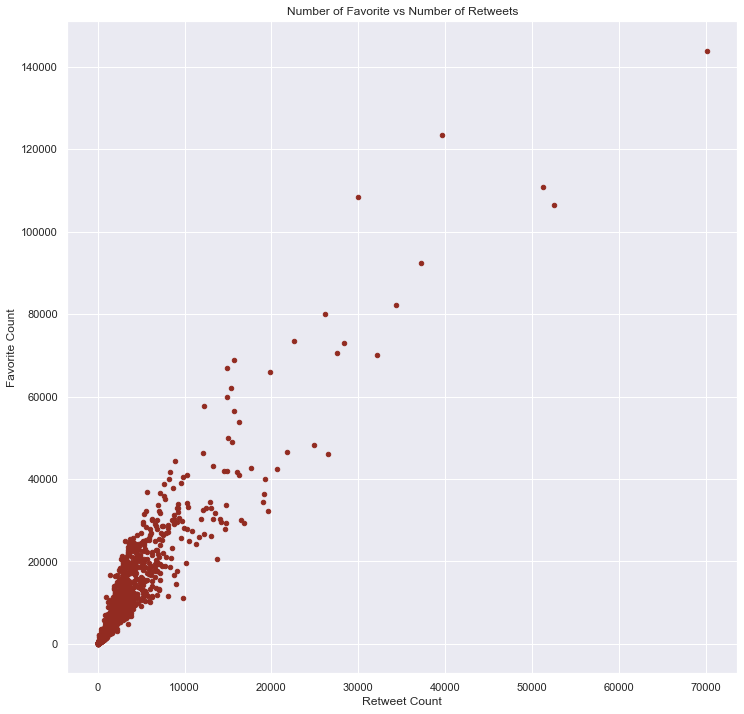

In [69]:
#Plotting a scatter plot of retweet count against favorite count
twitter_archive_master.plot(x='retweet_count', y='favorite_count', kind='scatter', color='#922b21', 
title='Number of Favorite vs Number of Retweets', xlabel='Retweet Count', ylabel='Favorite Count');

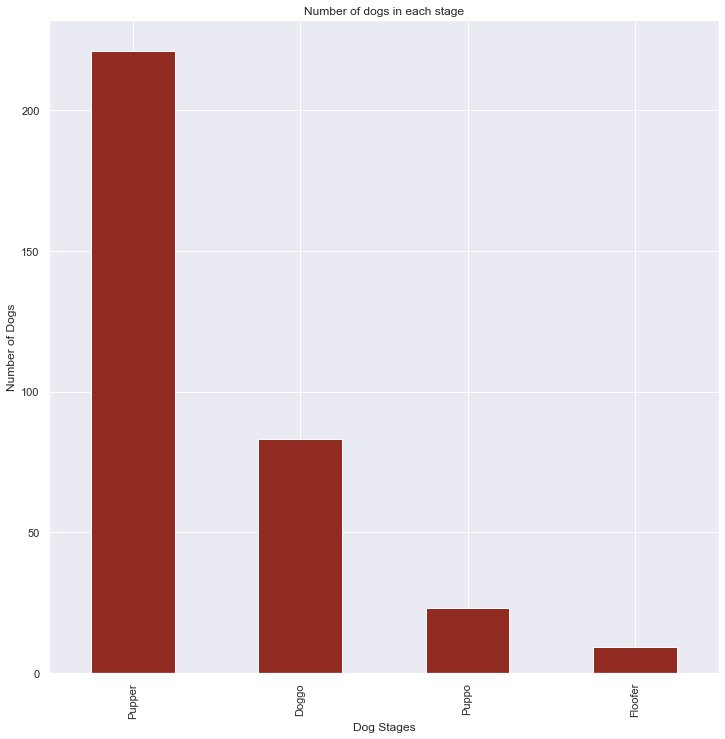

In [70]:
#Plotting the dog stage
twitter_archive_master['dog_stage'].value_counts().plot(kind="bar", color='#922b21', 
title='Number of dogs in each stage', xlabel='Dog Stages', ylabel='Number of Dogs');

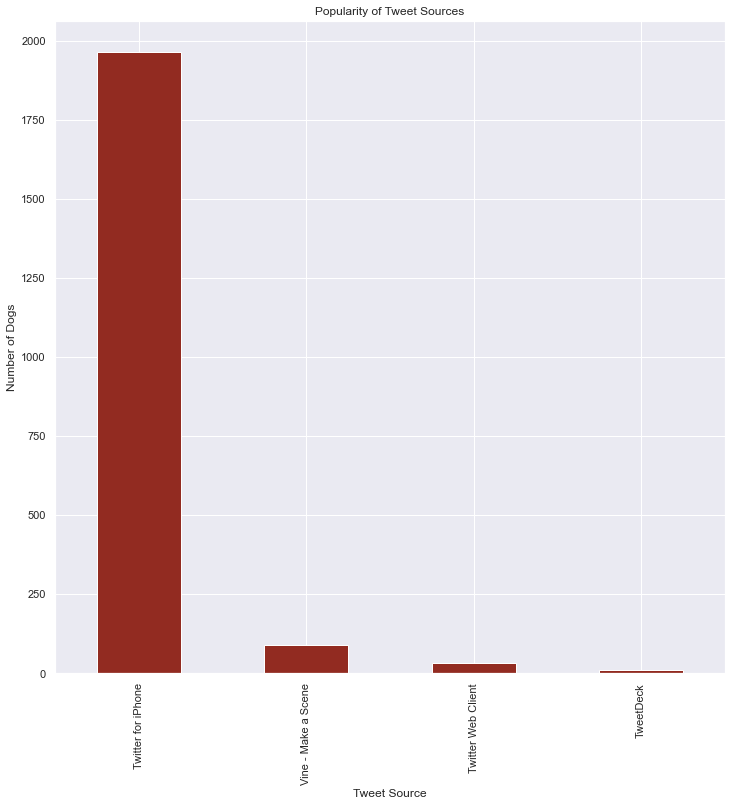

In [71]:
#Plotting the sources of tweets
twitter_archive_master['source'].value_counts().plot(kind='bar', color='#922b21', 
title='Popularity of Tweet Sources', xlabel='Tweet Source', ylabel='Number of Dogs');

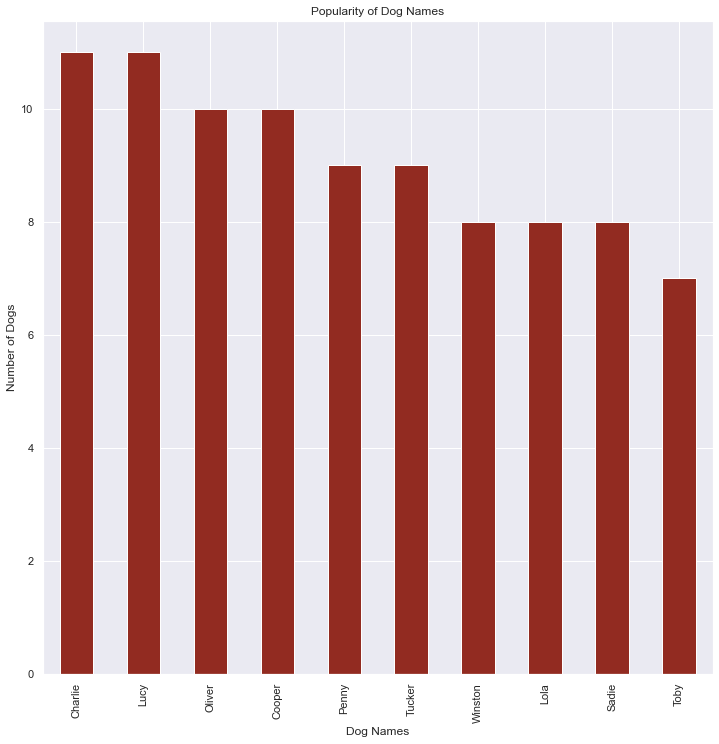

In [72]:
#Plotting dog names
twitter_archive_master['name'].replace('None', np.nan, inplace=True)
twitter_archive_master['name'].value_counts()[0:10].plot(kind='bar', color='#922b21', 
title='Popularity of Dog Names', xlabel='Dog Names', ylabel='Number of Dogs');

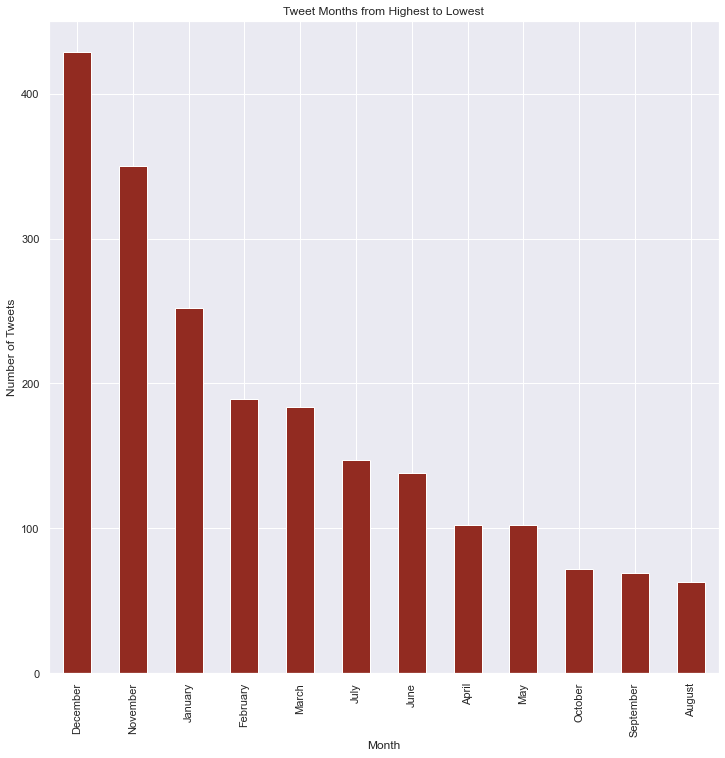

In [73]:
#Plotting the tweets per month
twitter_archive_master.groupby('month')['tweet_id'].count().sort_values(ascending=False).plot(kind='bar', color='#922b21',
title='Tweet Months from Highest to Lowest', xlabel='Month', ylabel='Number of Tweets');

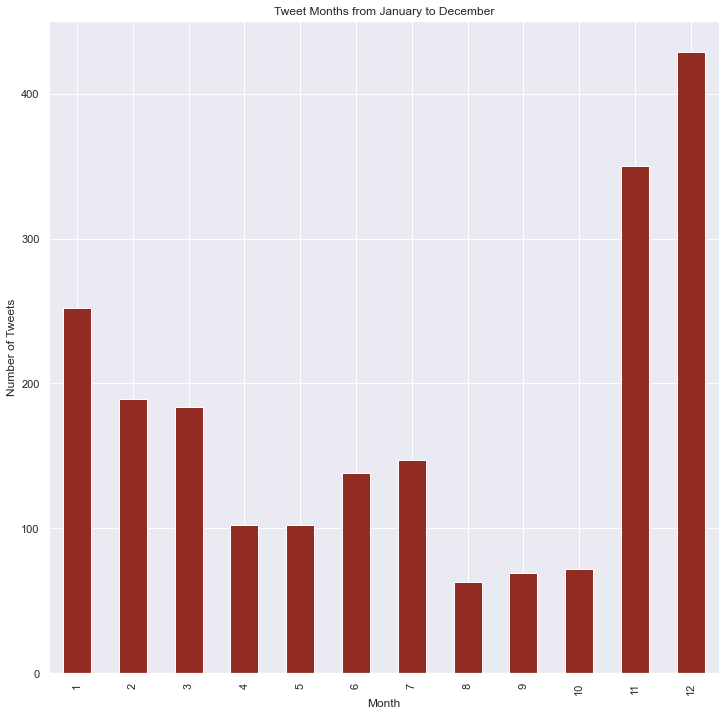

In [74]:
#Plotting the tweets per month
twitter_archive_master.groupby(twitter_archive_master['timestamp'].dt.month)['tweet_id'].count().plot(kind='bar', color='#922b21',
title='Tweet Months from January to December', xlabel='Month', ylabel='Number of Tweets');

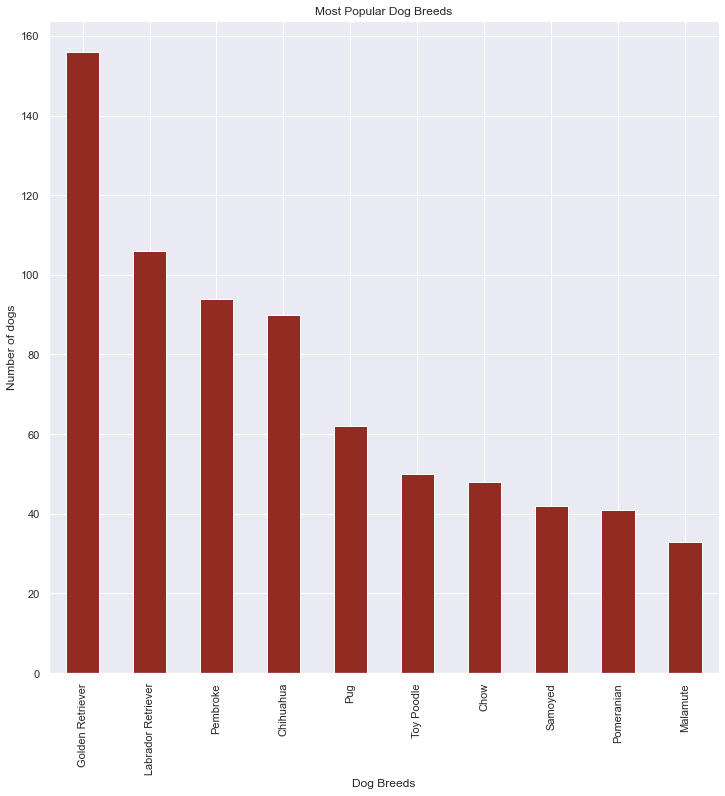

In [75]:
#Plotting dog breeds
twitter_archive_master['dog_breed'].value_counts()[:10].plot(kind='bar', color='#922b21',
title='Most Popular Dog Breeds', xlabel='Dog Breeds', ylabel='Number of dogs');

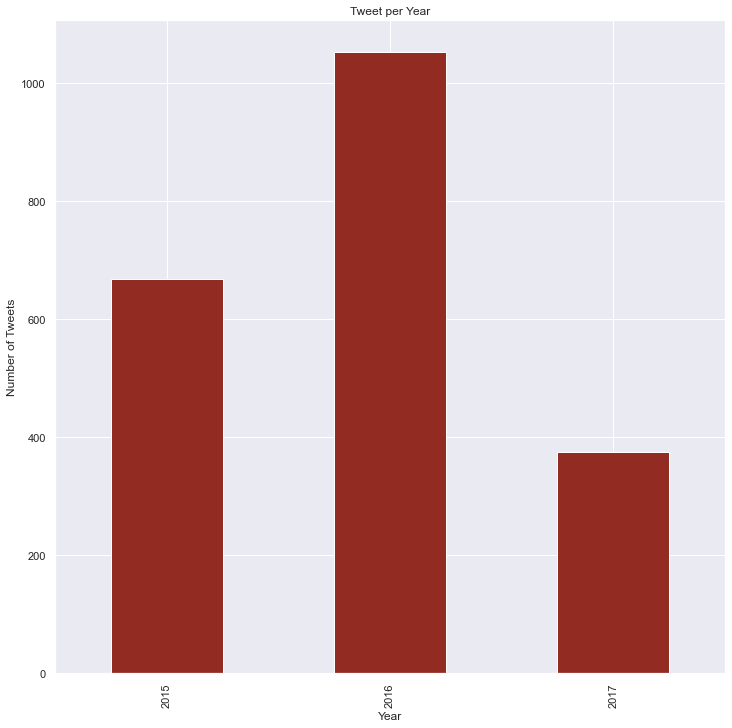

In [76]:
#Plotting tweets per year
twitter_archive_master.groupby('year')['tweet_id'].count().plot(kind='bar', color='#922b21', 
title='Tweet per Year', xlabel='Year', ylabel='Number of Tweets');

---

### Insights:
1. **2016** had the highest number of tweets
2. The month with the highest number of tweets is **December**, while the month with the lowest number of tweets is **August**
3. The most popular dog breed is **Golden Retriever**
4. **Charlie** and **Lucy** were the most popular dog names
5. **Twitter for iPhone** is the most popular tweet source
6. The stage with the highest number of dogs is **Pupper**
7. There is a correlation between **number of retweets** and **number of favourite**

## Conclusion
In this wrangle act, data was gathered, inspected for quality and tidiness issues, wrangled, cleaned and visualized. Despite the uniqueness of WeRateDogs twitter page, the project was carried out in a way as to account for such uniqueness. The insights gathered above are important in showing the admin of WeRateDogs twitter page the general performance, liked and dislikes of their followers and their dogs. WeRateDogs have a lot of potential as a brand and as a twitter page.

## Limitations
The following limitations were experienced when carrying out the wrangling
- Scraping the tweets took a lot of time because of the number of tweets and the rate limit of the twitter API. Also, getting the assess keys and assess token took a significant amount of time.
- A lot of columns had to be dropped because they were not necessary to the analysis of the data

References Used:
1. https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api
2. https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0015/modules/356d26d4-2237-46a0-ab78-e0ea93d9501a/lessons/ls2232/concepts/e7279c35-6d40-42e5-998d-9062ceac6d4c
3. https://ryanwingate.com/data-science/data-analysis-process/tidy-data/